<a href="https://colab.research.google.com/github/mamoor2019/AI/blob/main/Mamoor_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Booking.com - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Booking.com operates at the forefront of global hospitality, managing a diverse range of hotel bookings across various locations, customer profiles, and booking channels.

In the competitive landscape of travel and accommodation, companies like booking.com must continuously refine their booking processes to enhance customer satisfaction and optimize revenue.

Different factors—such as the booking window, guest demographics, and reservation types—affect hotel performance and customer experience.
In this project through exploratory data analysis of such data, booking.com aims to improve booking efficiency, predict guest needs, and tailor their offerings to better meet market demands. This strategic approach will help in streamlining operations, maximize occupancy rates, and deliver exceptional service, ensuring a competitive edge in the dynamic hospitality industry.

# **GitHub Link -**

https://github.com/mamoor2019/AI/blob/main/Mamoor_EDA_Capstone_Project.ipynb

# **Problem Statement**


The customer dataset offers valuable insights into how different factors—such as the booking window, guest demographics, and reservation types—affect hotel performance and customer experience. By analyzing this data, booking.com aims to improve booking efficiency, predict guest needs, and tailor their offerings to better meet market demands.



#### **Define Your Business Objective?**

Improve booking efficency,enhance customer satisfaction and optimize revenue.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [ ]:
# Load Dataset
# mount the data set
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Hotel Bookings.csv'

# Create dataframe
booking_df=pd.read_csv(file_path)
booking_df

### Dataset First View

In [ ]:
# Dataset First Look
# check first five rows
print(booking_df.head())

# check last five rows
print(booking_df.tail())

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# check the shape which will have both number of rows and columns
print(booking_df.shape)

### Dataset Information

In [ ]:
# Dataset Info
# check the information about the dataset
print(booking_df.info())

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# print the duplicate value count
duplicate_size=len(booking_df[booking_df.duplicated()])
print(f'There are {duplicate_size} duplicate values in the dataset')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(booking_df.isnull().sum())

In [ ]:
# Visualizing the missing values
# plotting the missing values in heat map
plt.figure(figsize=(10,8))
sns.heatmap(booking_df.isnull(),cmap='viridis',cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

### What did you know about your dataset?

The given dataset is from Booking.com. This dataset provides an extensive look into their booking operations, capturing key details such as booking lead times, arrival dates, meal plans, room types, and customer preferences. It also includes information on booking channels, special requests, and reservation statuses.

The purpose is to analyze the dataset for booking efficency,customer satisfaction and revenue optimization.

The above dataset has 119390 rows and 32 columns.
There are 31994 duplicate values in the dataset.
Column country has 488 missing values,Column agent has 16340 missing values and column company has 112593 missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# print the columns of the dataset
print(booking_df.columns)

In [ ]:
# Dataset Describe
# summary of the statistical properties of the numerical columns in the DataFrame
print(booking_df.describe())

### Variables Description

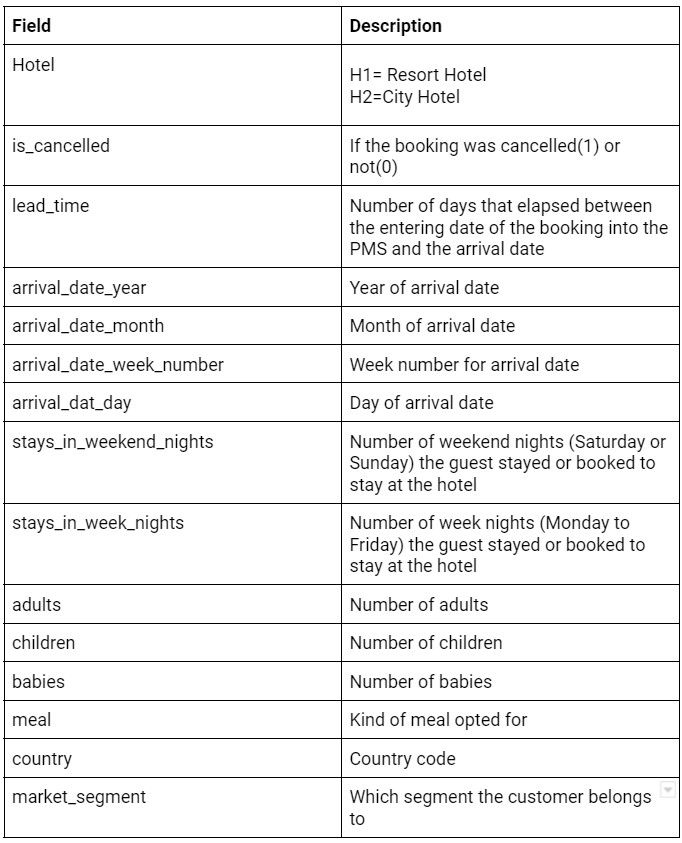
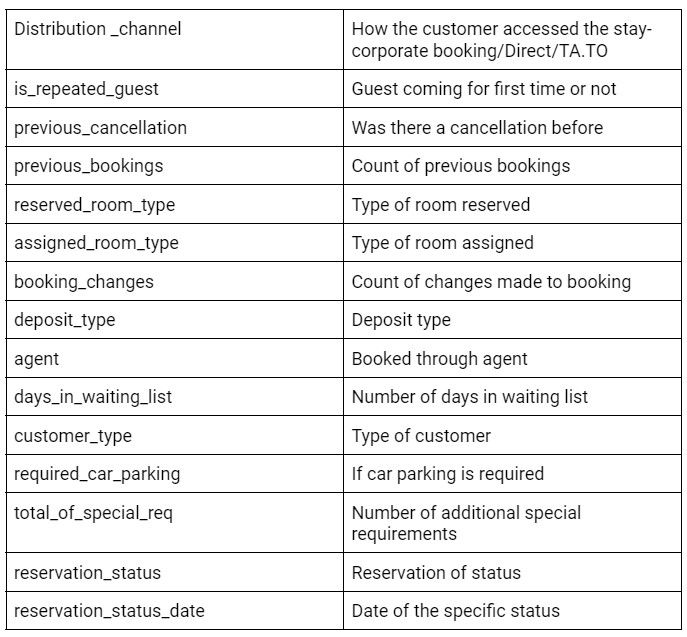

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in booking_df.columns:
    print(f"No. of unique values in column '{column}': {booking_df[column].nunique()}")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# creating copy of dataframe so that origional data is not disterbed
df = booking_df.copy()

# print the unique values of some of the important columns
print(df['hotel'].unique())
print(df['is_canceled'].unique())
print(df['arrival_date_year'].unique())
print(df['meal'].unique())
print(df['country'].unique())
print(df['market_segment'].unique())
print(df['distribution_channel'].unique())
print(df['reserved_room_type'].unique())
print(df['deposit_type'].unique())
print(df['company'].unique())
print(df['customer_type'].unique())
print(df['children'].unique())

### Cleaning Data

Cleaning of data is necessary before EDA to remove the ambigous data that can affect the outcome of EDA.

While cleaning the data will perform following steps:

1. Remove duplicate rows \
2. Handle missing values. \
3. Convert columns to appropriate datatypes. \
4. Add *new* columns

#### Step 1: Remove duplciate rows if any

In [ ]:
print(df[df.duplicated()].shape)  # show number of duplicate rows
# dropping duplicate values
df.drop_duplicates(inplace=True)
df.shape


#### Step 2: Missing values handeling

In [ ]:
# columns having missing values
df.isnull().sum().sort_values(ascending=False)[:5]

In [ ]:
# Company and agent columns have company number and agent numbers as data.
# There may be some cases when customer didnt booked hotel via any agent or via any company.
# So in that case values can be null under these columns.
# will replace null values by 0 in these columns
df[['company','agent']] = df[['company','agent']].fillna(0)

# 'children' column has 0 ans nan both values, which indicates nan is missing value
# replace the nan value with mean value
df.fillna({'children': df['children'].mean()}, inplace=True)

# for country column replace the missing values by 'other'
df.fillna({'country': 'other'}, inplace=True)

# check if all missing values are removed
df.isnull().sum().sort_values(ascending=False)[:5]

In [ ]:
# remove rows where  total number of adults, children or babies equal to zero
print(df[df['adults']+df['children']+df['babies']==0].shape)
df.drop(df[df['adults']+df['children']+df['babies']==0].index, inplace=True)

#### Step 3: Converting columns datatypes

In [ ]:
# converting datatype of columns 'children', 'company' and 'agent' to int.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

# changing datatype of column 'reservation_status_date' to datetime.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

#### Step 4: Adding new columns

In [ ]:
# add new column for total staying in days
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# add new column for total guest
df['total_guest'] = df['adults'] + df['children'] + df['babies']

# adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns are no more needed
df.drop(['adults', 'children', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights'], axis=1, inplace=True)

### EDA

In [ ]:
# top 3 agents making most number of bookings
df_agent=df['agent'].value_counts()[:3]
df_agent



In [ ]:
# top 3 room types in demand
df_room_type=df['assigned_room_type'].value_counts()[:3]
df_room_type


In [ ]:
# room type generating highest revenue
df_revenue=df.groupby('assigned_room_type')['adr'].mean().sort_values(ascending=False)[:3]
df_revenue=df_revenue.round(2)
df_revenue

In [ ]:
# percentage of booking in each hotel
grouped_by_hotel = df.groupby('hotel')
df_percentage = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).rename(columns = {0:'Booking %'})
df_percentage=df_percentage.round(2)
df_percentage

In [ ]:
# hotels making more revenue
df_hotel_revenue= grouped_by_hotel['adr'].mean().reset_index().rename(columns = {'adr':'Average Revenue','hotel':'Hotel'})
df_hotel_revenue=df_hotel_revenue.round(2)
df_hotel_revenue

In [ ]:
# hotel having high lead time
df_hotel_leadtime= grouped_by_hotel['lead_time'].mean().reset_index().rename(columns = {'lead_time':'Average Lead Time','hotel':'Hotel'})
df_hotel_leadtime=df_hotel_leadtime.round(2)
df_hotel_leadtime

In [ ]:
# hotel with long waiting time
df_hotel_waiting= grouped_by_hotel['days_in_waiting_list'].mean().reset_index().rename(columns = {'days_in_waiting_list':'Average Waiting Time','hotel':'Hotel'})
df_hotel_waiting=df_hotel_waiting.round(2)
df_hotel_waiting

In [ ]:
# hotel and cancellation
# counting number of cancelled bookings for each hotel.
cancelled_df = df[df['is_canceled'] == 1]
cancelled_grp = cancelled_df.groupby('hotel')
total_cancelled_df = pd.DataFrame(cancelled_grp.size()).rename(columns = {0:'Total Canelled Bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
total_booking_df = pd.DataFrame(total_booking).rename(columns = {0: 'Total Bookings'})

# Combining two dataframes
total_booking_df = total_booking_df.join(total_cancelled_df)

# Calculating cancel percentage
total_booking_df['Cancel %'] = round((total_booking_df['Total Canelled Bookings']/total_booking_df['Total Bookings'])*100,2)
total_booking_df


In [ ]:
# hotel with high chance that its customer will return for another stay

# counting repeated customer booking
repeated_df = df[df['is_repeated_guest'] == 1]
repeated_grp = repeated_df.groupby('hotel')
total_repeated_df = pd.DataFrame(repeated_grp.size()).rename(columns = {0:'Total Repeated Bookings'})

# counting total bookings
total_booking = grouped_by_hotel.size()
total_booking_df = pd.DataFrame(total_booking).rename(columns = {0: 'Total Bookings'})

join_df = total_booking_df.join(total_repeated_df)

# Calculating repeat percentage
join_df['Repeat %'] = round((join_df['Total Repeated Bookings']/join_df['Total Bookings'])*100,2)
join_df

In [ ]:
# channels used for early booking
group_by_channel = df.groupby('distribution_channel')
df_channel = pd.DataFrame(round(group_by_channel['lead_time'].median(),2)).rename(columns = {'lead_time':'Median Lead Time'})
df_channel

In [ ]:
# distribution channel and revenue generating deals for the hotels
group_by_channel_hotel = df.groupby(['distribution_channel','hotel'])
df_channel_revenue = pd.DataFrame(round(group_by_channel['adr'].mean(),2)).rename(columns = {'adr':'Average Revenue'})
df_channel_revenue

In [ ]:
# distribution channel and cancellation percentage
df_channel_cancel = pd.DataFrame(df.groupby('distribution_channel')['is_canceled'].sum()/df.groupby('distribution_channel')['is_canceled'].count()*100).drop(index='Undefined').rename(columns = {'is_canceled':'Cancellation %'})
df_channel_cancel

In [ ]:
# countries from where most of the guests are coming
df_country = pd.DataFrame(df['country'].value_counts()).head(5)
df_country

In [ ]:
# market segment wise bookings
df_market_segment = pd.DataFrame(df['market_segment'].value_counts())
df_market_segment

In [ ]:
# relationship between market segment and cancellation

cancelled_by_market_segment_grp = cancelled_df.groupby('market_segment')
market_segment_cancelled_df = pd.DataFrame(cancelled_by_market_segment_grp.size()).rename(columns = {0:'Total Canelled Bookings'})

# Counting total number of bookings for each market segment
grouped_by_market_segment = df.groupby('market_segment')
market_segment_booking_df = pd.DataFrame(grouped_by_market_segment.size()).rename(columns = {0: 'Total Bookings'})

# Combining two dataframes
total_market_segment_booking_df = market_segment_booking_df.join(market_segment_cancelled_df)

# Calculating cancel percentage
total_market_segment_booking_df['Cancel %'] = round((total_market_segment_booking_df['Total Canelled Bookings']/total_market_segment_booking_df['Total Bookings'])*100,2)
total_market_segment_booking_df

In [ ]:
# average hotel stay
df_total_stay= grouped_by_hotel['total_stay'].mean().reset_index().rename(columns = {'total_stay':'Average stay in days','hotel':'Hotel'})
df_total_stay=df_total_stay.round(2)
df_total_stay

In [ ]:
# average total guest and average adr relation
df_total_guest= grouped_by_hotel['total_guest'].mean().reset_index().rename(columns = {'total_guest':'Average guest','hotel':'Hotel'})
df_total_guest=df_total_guest.round(2)
df_average_adr= grouped_by_hotel['adr'].mean().reset_index().rename(columns = {'adr':'Average Daily Revenue','hotel':'Hotel'})
df_average_adr=df_average_adr.round(2)
df_combined_guest_adr=df_total_guest.merge(df_average_adr,on='Hotel')
df_combined_guest_adr

### What all manipulations have you done and insights you found?

Although it's the graphs and charts which will give the celar picture of corelation among the data mentioned in the dat set. I have analyzed the data related to bookings, cancelation, revenue generation and number of days stayed etc to gain insight of the informations which can help booking.com to enhance customer satisfaction and otpimize the booking process.

The top three agents who are making the most numbers of bookings are shown in the below table:

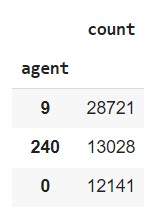

It can be seen that it's the agent 9 who is making the most number of bookings.

Three most popular room types assigned to guests are:

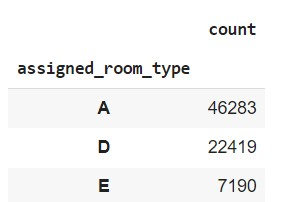

Room A is the most assigned room to the guests.

Three assigned room types which are generating high average daily revenue are shwon in below table.

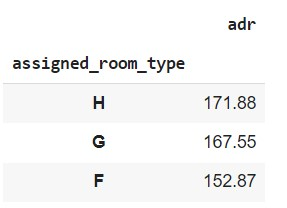

It can be seen that even though room type A is the most popular but it's the room type H which is generating more average daily revenue.

The booking percentage in hotels are:

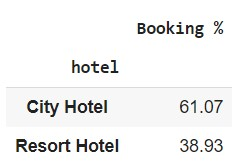

The City hotel has more perencatge of booking. It can be infered that City hotel will be more occupied.

The average revenue of hotels are shown in the below table.

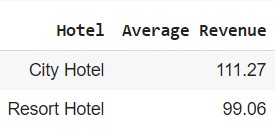

The hotel wise average lead time are shown in below table.

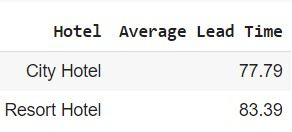                     

It can be observed from above two table that the hotel which has less lead time has more average daily revenue.

Average waiting time in days for the hotels are:

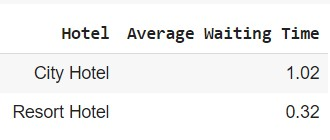


Hotel wise total booking and percentage of cancelation are shown in the below table.

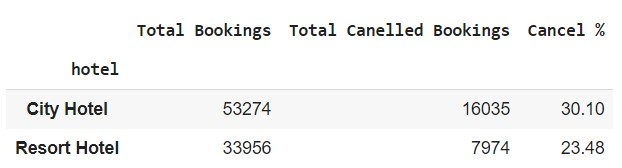

The City hotel has the highest booking as well as highest cancelation percentage.

The repeated booking percentage is shown in this table.

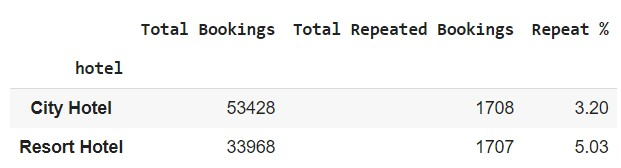

The City hotel has highest number of booking but less percentage of repeated booking compared to Resort hotel.

It can be infered that City hotel guests are less satisfied from the service so not returning for staying again.

The distribution channel wise median lead time is shown in below table.

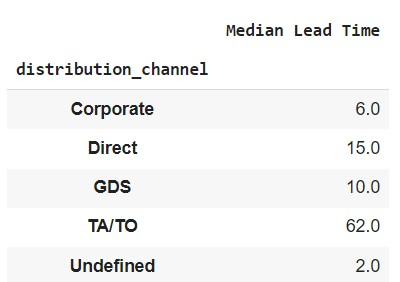

Distribution channel and it’s average revenue generation are shown in this table.

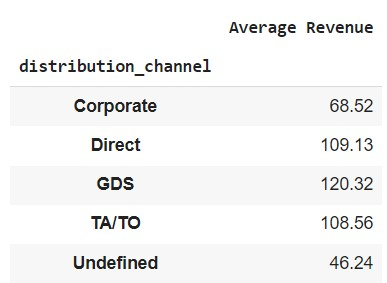

GDS is the channel which is generating highest average revenue.

Distribution channel wise percentage cancellation is shown in below table.

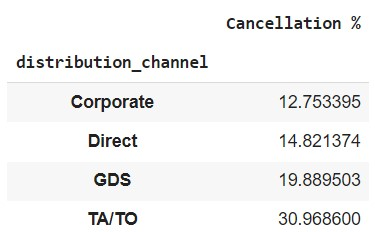

Top five countries from where most of the guest are coming is shown in this table.

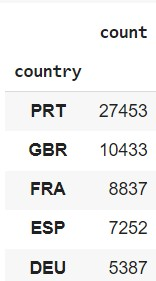

PRT is the country from where highest number of guests are staying in the hotels.

Market segment wise bookings are shown in this table.

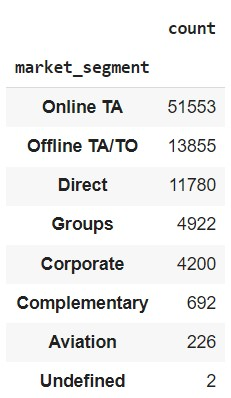

Online TA is the segment from where highest guest has booked.

The table shown below shows the market segment wise percentage of cancellation.

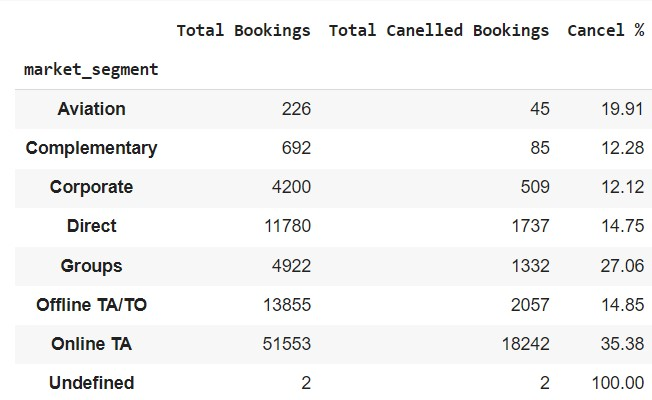

It can be observed that Online TA has the highest booking numbers as well as highest percentage cancelation.

Hotel wise average numbers of stay in days are shown in this table.

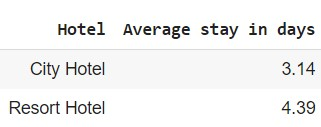

Resort hotel has more number of stays than City Hotels.

Hotel wise average number of guests and mean average daily revenue is shown in below table.

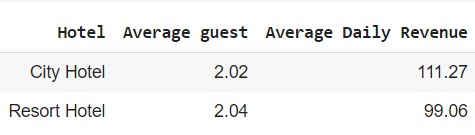

It can be observed that city hotel has less number of guests but more revenue.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Heatmap to show the correlation between the numerical data (Multivariate)

In [ ]:
# Chart - 1 visualization code

# selecting only the numerical data
num_df = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_guest']]

# Calculate the correlation matrix
correlation_matrix=num_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a useful for visualizing data correlation between multiple numerical variables.Heatmaps effectively highlight patterns, trends, and anomalies in the correlation matrix, making it easier to spot strong or weak correlations.For datasets with many variables, heatmaps can condense complex information into a visual format that is easier to interpret compared to a traditional table of correlation coefficients. So I used heatmap to understand the correlation between different numerical variables mentioned in the given dataset.

##### 2. What is/are the insight(s) found from the chart?

Following are the insights from the correlation heatmap:
1. Total stay duration and lead time have moderate correlation. This means people usually plan early for longer duration stay in hotel.
2. Average daily revenue(adr) is also moderately correlated with total guest. Which is logically true as the number of guest will increase, revnue will also increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insight will help in improving customer satisfcation and increasing in revenue.Since total stary duration is positvely correlated to lead time, Booking.com should avertise the trip plan well in advance so that people who are planning early will book it for longer duration. As number of guest increases so the revenue so Booking.com should plan family combo or group bookings to increase the revenue.

#### Chart - 2 : Scatter Plot to show the relationship between Average Daily Revenue(adr) and Total Stay(Biveriate)

In [ ]:
# Chart - 2 visualization code
# defining function to crete scatter plot. This will avoid code duplciation as need to call it again after removing the outlier
def create_scatter_plot():
  # set chart size
  plt.figure(figsize=(10, 6))
  # creating scatter plot
  sns.scatterplot(y='adr',x='total_stay',data=df)
  plt.title('Average Daily Revenue vs Total Stay')
  plt.xlabel('Total Stay')
  plt.ylabel('Average Daily Revenue')
  plt.show()

create_scatter_plot()


There is an outlier in adr, so will remove it for better scatter plot

In [ ]:
df.drop(df[df['adr']>5000].index,inplace=True)
# replot the scatter plot
create_scatter_plot()

##### 1. Why did you pick the specific chart?

Scatter plot helps in visualizing the relationship between two variables, making it easier to see if they are correlated (positively, negatively, or not at all).It is easy to spot outliers in Scatter plot. I wanted to find out the relation between adr and total_stay, and detect if any outlier is persent. So I used Scatter plot.

##### 2. What is/are the insight(s) found from the chart?

The Scatter plot between adr and total_stay shows that as the duration of total stay increases the adr decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the duration of stay increases the average daily revenue decreases. A better package for longer stay can be planned and advertised that if you stay more pay less. This may increase the booking volume and revenue.

#### Chart - 3 : Bar chart to show the Agents making most number of bookings(Univariate)

In [ ]:
# Chart - 3 visualization code

grp_by_agent = df.groupby('agent')
# creating the data frame
df_agents = pd.DataFrame(grp_by_agent.size()).rename(columns = {0:'No. of bookings'}).sort_values('No. of bookings', ascending = False)
# agent value 0 indicates booking not done by agent, drop this row
df_agents.drop(index=0, inplace=True)
df_agents = df_agents[:10] # will plot 10 top agents
plt.figure(figsize=(10, 6))
sns.barplot(x = df_agents.index, y = df_agents['No. of bookings'],order=df_agents.index,hue=df_agents.index,palette='Set2',legend=False)
# title and label setting
plt.title('Top 10 Agents with most number of bookings')
plt.xlabel('Agent ID')
plt.ylabel('No. of bookings')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts allow for straightforward comparison between different categories or groups. The lengths of the bars make it easy to see which categories are larger or smaller. I wanted to compare the agents who have done the maximum bookings so Bar chart was natural choice.

##### 2. What is/are the insight(s) found from the chart?

Agnet number 9 have done the maximum bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will help Booking.com in maintining the good relation to the agents who are making good number of bookings.

#### Chart - 4 : Pie chart to show %bshare of booking for City Hotel and Resort Hotel in total booking

In [ ]:
# Chart - 4 visualization code
grouped_by_hotel = df.groupby('hotel')
# creating the data frame for % distribution
df_hotel = pd.DataFrame(grouped_by_hotel.size()/df.shape[0]*100).rename(columns = {0:'Percentage'})
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_hotel['Percentage'], labels=df_hotel.index, autopct='%1.1f%%', startangle=90)
plt.title('% Share of Booking for City Hotel and Resort Hotel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is suitable for showing simple part-to-whole relationships when number of categories are limited.It helps in visualizing how different categories contribute to a total. I wanted to show the % share of each hotel type in total booking. Since the type of hotel was just two , used Pie chart to visualize it.


##### 2. What is/are the insight(s) found from the chart?

61.1% bookings are from City Hotel and 38.9% bookings are from Resort Hotel

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help bookings.com to give more focus in Resort Hotel to improve the customer satisfaction.

#### Chart - 5 : Count plot to show relationship between deposit type and cancellation

> Add blockquote



In [ ]:
# Chart - 5 visualization code

# filter the dataframe for refundable deposit type
df[df['deposit_type']=='Refundable'].deposit_type.count()
# create sns countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type',data=df ,hue='is_canceled')
plt.title("Booking Canceled or not by Deposit type")
plt.xlabel("Deposit Type")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot in Seaborn is a type of bar plot that displays the count of observations in each categorical bin. I wanted to show the canceled or not for the deposit type so used the count plot.

##### 2. What is/are the insight(s) found from the chart?

Rougly 25% of bookings were cancelled by guests with no deposit.It is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Twenty fiver percent of the guest with no deposit had cancelled the booking. These numbers are huge if the hotels were not able to replace the cancelled bookings in time there will be significant revenue loss.

#### Chart - 6: Bar chart for contribution of distribution channel in revenue generating deals for hotels

In [ ]:
# Chart - 6 visualization code

groub_by_dc_hotel=df.groupby(['distribution_channel','hotel'])
df_dc_hotel=pd.DataFrame(groub_by_dc_hotel['adr'].mean()).reset_index().rename(columns={'adr':'Average Revenue'})
df_dc_hotel=df_dc_hotel.round(2)
# creating bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df_dc_hotel['distribution_channel'],y=df_dc_hotel['Average Revenue'],hue=df_dc_hotel['hotel'])
plt.title('Contribution of distribution channel in revenue generating deals for hotels')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Revenue')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts allow to compare different categorical data side by side. The length of each bar shows which categories are larger or smaller. I wanted to find which distribution channel brings better revenue generating deals for the hotels. So used bar chart for the comparesion.

##### 2. What is/are the insight(s) found from the chart?

GDS channel brings higher revenue generating deals for City hotel. Direct and TA/TO brings more revenue generating deals for Resort hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

GDS channel brings more evenue generating deals for City hotel, so Booking.com should increase their outreach on GDS channel for better revenue generation.
Even though Resort hotel has better revenue generating deals with Direct and TA/TO but no deals from GDS. Resort Hotel need to increase outreach on GDS channel to increase revenue.

#### Chart - 7 : Box plot for room type generatest highest adr

In [ ]:
# Chart - 7 visualization code

# creating box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='assigned_room_type',y='adr',data=df,hue='assigned_room_type',palette='Set2',legend=False)
plt.title('Room type generatest highest adr')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Revenue')
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are useful for visualizing the central tendency, variability, and potential outliers of a dataset.It is particularly useful for comparing distributions across different categories or groups within a dataset. Since I wanted to compare the adr for different room types used the box plot.

##### 2. What is/are the insight(s) found from the chart?

Rooms of type H, G and C have better adr.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hotels should increase the number of rooms for types H, G and C to maximise the revenue.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***